# P4C3 - Apprentissage d'ensemble

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/notebooks/P4C3_apprentissage_ensemble.ipynb)

Dans ce notebook, nous allons travailler sur les forets aléatoires et le Gradientboosting



In [40]:
# imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



### Charger le dataset

In [41]:
from  sklearn.datasets import make_hastie_10_2
X, y = make_hastie_10_2(n_samples=12000, random_state=808)

X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.8, random_state=8)

In [42]:
X.shape

(12000, 10)

Regardons comment évolue le score de notre classification du stade de développement en accroissant le nombre d'arbres. 

On considère un arbre de profondeur 2 comme modèle de base. Le nombre d'arbres dans la forêt varie de 1 à 120.

In [43]:
tree_counts = [1,2,3,4,5,10,15,20,25,30,40,50, 60, 70, 80, 90, 100, 110, 120, 150, 200]

accuracy  = []
for n_estimator in tree_counts:
    clf = RandomForestClassifier(
        n_estimators = n_estimator,
        max_depth = 2,
        max_features = 3,
        random_state = 8
        )

    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test, y_test))

    print(f"{n_estimator} trees \t accuracy test: {np.round(clf.score(X_test, y_test), 3)} \t accuracy train {np.round(clf.score(X_train, y_train), 3)}", )


1 trees 	 accuracy test: 0.566 	 accuracy train 0.593
2 trees 	 accuracy test: 0.622 	 accuracy train 0.644
3 trees 	 accuracy test: 0.632 	 accuracy train 0.664
4 trees 	 accuracy test: 0.645 	 accuracy train 0.679
5 trees 	 accuracy test: 0.666 	 accuracy train 0.689
10 trees 	 accuracy test: 0.714 	 accuracy train 0.725
15 trees 	 accuracy test: 0.729 	 accuracy train 0.745
20 trees 	 accuracy test: 0.732 	 accuracy train 0.754
25 trees 	 accuracy test: 0.726 	 accuracy train 0.756
30 trees 	 accuracy test: 0.73 	 accuracy train 0.752
40 trees 	 accuracy test: 0.726 	 accuracy train 0.754
50 trees 	 accuracy test: 0.742 	 accuracy train 0.767
60 trees 	 accuracy test: 0.741 	 accuracy train 0.762
70 trees 	 accuracy test: 0.744 	 accuracy train 0.769
80 trees 	 accuracy test: 0.748 	 accuracy train 0.772
90 trees 	 accuracy test: 0.749 	 accuracy train 0.773
100 trees 	 accuracy test: 0.752 	 accuracy train 0.77
110 trees 	 accuracy test: 0.751 	 accuracy train 0.774
120 trees 	 acc

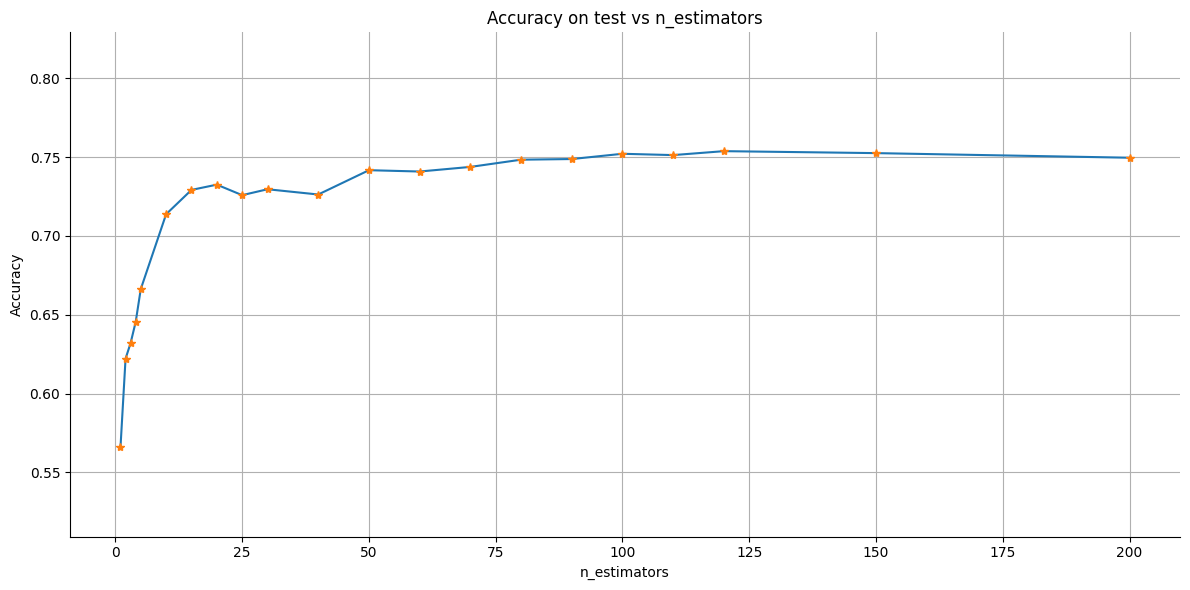

In [44]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(tree_counts, accuracy)
plt.plot(tree_counts, accuracy,'*')
ax.grid(True, which = 'both')
ax.set_title('Accuracy on test vs n_estimators')
ax.set_xlabel('n_estimators')
ax.set_ylabel('Accuracy')
ax.set_ylim(0.9 * np.min(accuracy), 1.1 * np.max(accuracy))
# plt.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()


Reprenons maintenant le même exercice mais cette fois sans contraindre la profondeur des arbres de decision. 


In [ ]:
tree_counts = [1,2,3,4,5,10,15,20,25,30,40,50, 60, 70, 80, 90, 100, 110, 120, 150]

accuracy  = []

for n_estimator in tree_counts:
    clf = RandomForestClassifier(
        n_estimators = n_estimator,
        max_depth = None,
        max_features = None,
        random_state = 8
        )

    clf.fit(X_train, y_train)
    accuracy.append({
        'n': n_estimator,
        'test': clf.score(X_test, y_test),
        'train': clf.score(X_train, y_train),
    })

    print(f"{n_estimator} trees \t accuracy test: {np.round(clf.score(X_test, y_test), 3)} \t accuracy train {np.round(clf.score(X_train, y_train), 3)}", )


accuracy = pd.DataFrame(accuracy)
accuracy['delta'] = np.abs(accuracy.train - accuracy.test)


1 trees 	 accuracy test: 0.772 	 accuracy train 0.912
2 trees 	 accuracy test: 0.748 	 accuracy train 0.905
3 trees 	 accuracy test: 0.826 	 accuracy train 0.969
4 trees 	 accuracy test: 0.811 	 accuracy train 0.969
5 trees 	 accuracy test: 0.851 	 accuracy train 0.984
10 trees 	 accuracy test: 0.854 	 accuracy train 0.995
15 trees 	 accuracy test: 0.87 	 accuracy train 0.997
20 trees 	 accuracy test: 0.879 	 accuracy train 0.999
25 trees 	 accuracy test: 0.886 	 accuracy train 0.999


In [ ]:


accuracy

In [ ]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 2, 1)
plt.plot(accuracy.n, accuracy.train, label = 'score train')
plt.plot(accuracy.n, accuracy.train,'*')

plt.plot(accuracy.n, accuracy.test, label = 'score test')
plt.plot(accuracy.n, accuracy.test,'*')

# plt.plot(accuracy.n, accuracy.delta, label = 'delta')
# plt.plot(accuracy.n, accuracy.delta,'*')

ax.grid(True, which = 'both')
ax.set_title('Accuracy')
ax.set_xlabel('n_estimators')
ax.set_ylabel('Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_ylim(0.9 * np.min(accuracy), 1.1 * np.max(accuracy))

ax.legend()
# --
ax = fig.add_subplot(1, 2, 2)
plt.plot(accuracy.n, accuracy.delta, label = 'delta')
plt.plot(accuracy.n, accuracy.delta,'*')

ax.grid(True, which = 'both')
ax.set_title('Différence score(test) - score(train) ')
ax.set_xlabel('n_estimators')
ax.set_ylabel('Différence score(test) - score(train)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_ylim(0.9 * np.min(accuracy), 1.1 * np.max(accuracy))

ax.legend()
plt.tight_layout()

In [ ]:
accuracy

## Feature Importance 

Comme le modèle de foret aleatoire ne prend en compte qu'une partie des variables ou features pour l'entrainement de chaque arbre, il est possible d'estimer l'importance de chacune des variables du dataset par le biais de la propriété _feature_importances_ du modèle. 


Pour illustrer cela, reprenons notre dataset des arbres en version numérisée. 

In [ ]:
filename = 'https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/paris-arbres-numerical-2023-09-10.csv'
data = pd.read_csv(filename)

In [ ]:
X = data[['domanialite', 'arrondissement','libelle_francais', 'genre', 'espece','circonference_cm', 'hauteur_m']]
y = data.stade_de_developpement.values

X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.8, random_state=808)

Entraînons une forêt aléatoire 



In [ ]:
clf = RandomForestClassifier(
    n_estimators = 100,
    random_state = 8
    )

clf.fit(X_train, y_train)

print("test :",np.round(clf.score(X_test, y_test), 3))
print('train:', np.round(clf.score(X_train, y_train), 3))


L'importance relative de chaque variable est:

In [ ]:
print(clf.feature_importances_)

soit

In [ ]:
df = pd.DataFrame()
df['feature'] = X.columns
df['importance'] = clf.feature_importances_
df.sort_values(by = 'importance', ascending = False, inplace = True)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)

sns.barplot(data = df, x='feature', y='importance')
ax.set_title('Feature importance')
ax.set_xlabel('Variable')
ax.set_ylabel('Importance')
ax.grid(True, which = 'both')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()


# Gradient Boosting Classifier

On entraîne maintenant un modele de GradientBoostingClassifier sur le dataset de Hastie. 

Faisons varier le learning rate pour observer son impact sur le score du modèle.

La fonction staged_predict_proba donne la probabilité des prédictions du modèle à chaque itération

In [ ]:
X, y = make_hastie_10_2(n_samples=12000, random_state=808)

X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.8, random_state=8)

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split


X, y = make_hastie_10_2(n_samples=4000, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

learning_rates = [1, 0.6,  0.3, 0.1]


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

for lr in learning_rates:

    clf = GradientBoostingClassifier(
                    n_estimators= 500,
                    max_depth= 2,
                    random_state= 8,
                    learning_rate= lr
    )
    clf.fit(X_train, y_train)

    scores = np.zeros((clf.n_estimators,), dtype=np.float64)
    for i, y_proba in enumerate(clf.staged_predict_proba(X_test)):
        scores[i] =  log_loss(y_test, y_proba[:, 1])

    ax.plot(
        (np.arange(scores.shape[0]) + 1),
        scores,
        "-",
        label=f"alpha: {lr}",
    )

ax.grid(True, which = 'both')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel("Itérations")
ax.set_ylabel("Log Loss (test)")
ax.set_title("Influence du learning rate sur la performance du GradientBoosting")
ax.legend()
plt.tight_layout()


On observe que :
- learning_rate = 1 ou 0.6, le modèle converge puis diverge. Le score sur le test repart à la hausse après avoir diminué. Le modèle perd sa capacité d'extrapolation.

- Pour learning_rate = 0.1, le modèle converge mais plus lentement que pour learning_rate = 0.3.